# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [2]:
#Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split


df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [3]:
#Your code here - Manipulate column names
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [5]:
#Your code here - Define the target and predictors
target = 'list_price'
x_cols = list(df.columns)
x_cols.remove(target)

In [6]:
#Your code here - Fit the actual model
train, test = train_test_split(df)

In [7]:
print(len(train))
print(len(test))
train.head()

8152
2718


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
7647,-0.556943,18.2878,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
871,-0.463104,30.3620,-0.342657,1.087407,0.990651,0.117830,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6962,-0.501602,12.1878,-0.398512,0.216064,-0.045687,1.244458,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1515,-0.427012,36.5878,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2969,0.245502,35.5980,-0.091306,0.564601,0.576116,0.922564,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
test.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
421,-0.454683,19.9900,-0.426440,-2.397964,-1.082024,-3.583946,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
9470,-0.348813,28.3929,-0.147162,0.216064,-0.045687,-0.204063,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
7723,-0.454683,32.9278,-0.426440,-2.397964,-1.082024,-3.583946,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9530,4.402096,319.4929,1.333013,-1.178084,0.161581,0.600671,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7869,-0.455886,18.2878,0.662745,0.216064,0.368848,0.922564,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [10]:
#Your code here - Remove features which do not appear to be statistically relevant
predictors = '+'.join(x_cols)
formula = target + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     540.1
Date:                Tue, 03 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:16:33   Log-Likelihood:                -40724.
No. Observations:                8152   AIC:                         8.164e+04
Df Residuals:                    8057   BIC:                         8.230e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           62.7323      2.149     29.195      0.000      58.520      66.944
piece_count                                         76.1939      0.899     84.797      0.000      74.433      77.955
num_reviews                                          5.5931      0.683      8.185      0.000       4.254       6.933
play_star_rating                                     5.0284      0.643      7.817      0.000       3.767       6.289
star_rating                                         -1.1930      0.730     -1.635      0.102      -2.624       0.238
val_star_rating                                     -8.7489      0.652    -13.416      0.000     -10.027      -7.471
ages_10plus                                        120.8852      7.455     16.215      0.000     106.271     135.499
ages_10_14                                         -22.9662      9.459     -2.428      0.015     -41.509      -4.423
ages_10_16                                         -11.0495      4.318     -2.559      0.011     -19.513      -2.586
ages_10_21                                          47.7004      8.363      5.704      0.000      31.306      64.094
ages_11_16                                         -21.7984      5.868     -3.715      0.000     -33.302     -10.295
ages_12plus                                         69.2112      5.868     11.795      0.000      57.708      80.714
ages_12_16                                         -59.0970      6.641     -8.899      0.000     -72.115     -46.079
ages_14plus                                         26.7512      4.341      6.162      0.000      18.241      35.261
ages_16plus                                         41.0959      6.113      6.723      0.000      29.114      53.078
ages_1half_3                                        -8.4093      2.469     -3.405      0.001     -13.250      -3.569
ages_1half_5                                        -4.5281      3.100     -1.460      0.144     -10.606       1.550
ages_2_5                                            15.2355      1.724      8.835      0.000      11.855      18.616
ages_4plus                                         -15.8304      6.297     -2.514      0.012     -28.173      -3.488
ages_4_7                                            -6.1145      4.172     -1.466      0.143     -14.292       2.063
ages_4_99                                           -3.6073      3.614     -0.998      0.318     -10.692       3.477
ages_5plus                                          -8.5581      3.426     -2.498      0.013     -15.273      -1.843
ages_5_12                                          -35.1032      3.355    -10.462      0.000     -41.681     -28.526
ages_5_8                                 

In [29]:
#Your code here - Refit the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|']<0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 70
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,62.7323,2.149,29.195,0.000,58.520,66.944
piece_count,76.1939,0.899,84.797,0.000,74.433,77.955
num_reviews,5.5931,0.683,8.185,0.000,4.254,6.933
play_star_rating,5.0284,0.643,7.817,0.000,3.767,6.289
star_rating,-1.1930,0.730,-1.635,0.102,-2.624,0.238


> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [30]:
#Your code here - Continue to refine the model
predictors= "+".join(x_cols)
formula = target + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     735.6
Date:                Tue, 03 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:25:23   Log-Likelihood:                -40736.
No. Observations:                8152   AIC:                         8.161e+04
Df Residuals:                    8082   BIC:                         8.210e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.7077      1.661     38.363      0.000      60.452      66.963
piece_count                                         76.3659      0.878     86.960      0.000      74.644      78.087
num_reviews                                          5.5259      0.665      8.305      0.000       4.222       6.830
play_star_rating                                     4.6656      0.543      8.600      0.000       3.602       5.729
val_star_rating                                     -9.2847      0.509    -18.230      0.000     -10.283      -8.286
ages_10plus                                        119.9553      5.224     22.961      0.000     109.715     130.196
ages_10_14                                         -17.8760      9.789     -1.826      0.068     -37.064       1.312
ages_10_16                                          -7.1954      4.044     -1.779      0.075     -15.123       0.732
ages_10_21                                          44.9493      3.394     13.244      0.000      38.296      51.602
ages_11_16                                         -18.0746      5.603     -3.226      0.001     -29.058      -7.091
ages_12plus                                         72.0813      6.361     11.332      0.000      59.612      84.550
ages_12_16                                         -54.8801      6.923     -7.927      0.000     -68.451     -41.310
ages_14plus                                         32.3239      4.698      6.880      0.000      23.114      41.534
ages_16plus                                         44.4824      6.764      6.576      0.000      31.223      57.742
ages_1half_3                                        -1.6255      3.168     -0.513      0.608      -7.836       4.585
ages_2_5                                            21.3670      2.017     10.592      0.000      17.413      25.321
ages_4plus                                         -12.9774      9.605     -1.351      0.177     -31.805       5.850
ages_5plus                                          -7.0598      3.367     -2.096      0.036     -13.661      -0.459
ages_5_12                                          -29.2532      2.743    -10.664      0.000     -34.630     -23.876
ages_6plus                                         -21.1561      5.548     -3.813      0.000     -32.032     -10.281
ages_6_12                                          -16.4490      1.949     -8.438      0.000     -20.270     -12.628
ages_7_12                                          -15.3178      2.304     -6.648      0.000     -19.835     -10.801
ages_7_14                                          -12.1852      2.063     -5.905      0.000     -16.230      -8.140
ages_8plus                               

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [31]:
#Your code here - Code a way to identify multicollinearity
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

C:\Users\Hazel\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.682453657954816),
 ('num_reviews', 2.8047385746057967),
 ('play_star_rating', 1.79122482716957),
 ('val_star_rating', 1.6112075601909301),
 ('ages_10plus', 7.348014020034002),
 ('ages_10_14', 1.1057456598008197),
 ('ages_10_16', 1.227741726861403),
 ('ages_10_21', 1.0667205958766532),
 ('ages_11_16', 1.1921297756395204),
 ('ages_12plus', 6.31903574936813),
 ('ages_12_16', 1.2217409903413972),
 ('ages_14plus', 2.0208805419170273),
 ('ages_16plus', 9.746745696761145),
 ('ages_1half_3', 1.0650001091089478),
 ('ages_2_5', 1.27582518955011),
 ('ages_4plus', 1.195960882796048),
 ('ages_5plus', inf),
 ('ages_5_12', 3.3689786198524017),
 ('ages_6plus', 2.726150251677151),
 ('ages_6_12', 2.3703485534618394),
 ('ages_7_12', 1.7677953326970497),
 ('ages_7_14', 2.347792191313698),
 ('ages_8plus', 2.607500126001255),
 ('ages_8_12', 1.390820646737163),
 ('ages_8_14', 2.329240929156755),
 ('ages_9plus', 1.4171575975099817),
 ('ages_9_12', 1.0244966226508694),
 ('ages_9_14', 2.05416

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [32]:
#Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

70 63


In [34]:
predictors = '+'.join(x_cols)
formula = target + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     735.9
Date:                Tue, 03 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:28:18   Log-Likelihood:                -41054.
No. Observations:                8152   AIC:                         8.224e+04
Df Residuals:                    8088   BIC:                         8.269e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.3993      1.410     46.387      0.000      62.636      68.163
piece_count                                         79.0704      0.689    114.798      0.000      77.720      80.421
num_reviews                                          4.5578      0.649      7.018      0.000       3.285       5.831
play_star_rating                                     5.8737      0.508     11.562      0.000       4.878       6.869
val_star_rating                                    -10.8583      0.505    -21.503      0.000     -11.848      -9.868
ages_10_14                                         -34.5764     10.066     -3.435      0.001     -54.308     -14.845
ages_10_16                                         -15.5799      3.881     -4.015      0.000     -23.187      -7.973
ages_10_21                                          43.5013      3.439     12.650      0.000      36.760      50.242
ages_11_16                                         -30.5011      5.377     -5.673      0.000     -41.041     -19.962
ages_12_16                                         -70.8168      6.634    -10.675      0.000     -83.821     -57.813
ages_14plus                                          8.9316      3.909      2.285      0.022       1.268      16.595
ages_1half_3                                        -2.1034      3.164     -0.665      0.506      -8.306       4.099
ages_2_5                                            20.4051      1.897     10.755      0.000      16.686      24.124
ages_4plus                                          -5.5717      9.934     -0.561      0.575     -25.045      13.901
ages_5_12                                          -31.7048      2.713    -11.687      0.000     -37.023     -26.387
ages_6plus                                         -24.5285      5.682     -4.317      0.000     -35.667     -13.390
ages_6_12                                          -21.0851      1.758    -11.993      0.000     -24.531     -17.639
ages_7_12                                          -19.2570      2.168     -8.882      0.000     -23.507     -15.007
ages_7_14                                          -16.3088      1.920     -8.496      0.000     -20.072     -12.546
ages_8plus                                           4.1936      4.785      0.876      0.381      -5.185      13.573
ages_8_12                                          -19.9514      2.716     -7.347      0.000     -25.275     -14.628
ages_8_14                                          -17.7948      1.987     -8.955      0.000     -21.690     -13.899
ages_9plus                                          19.9843     10.785      1.853      0.064      -1.157      41.126
ages_9_12                                

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

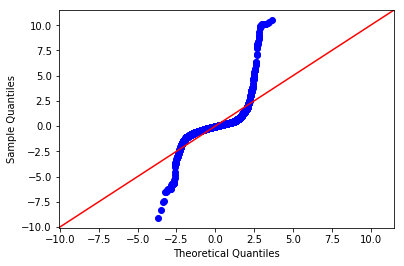

In [35]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

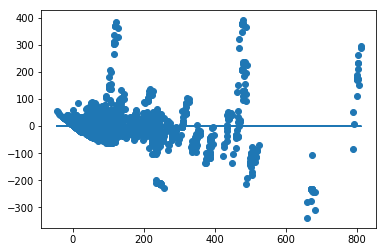

In [36]:
#Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

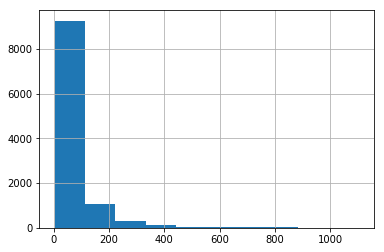

In [37]:
df.list_price.hist()

In [38]:
#Your code here - Check for outliers
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [40]:
#Your code here - Rerun the model with extreme outliers removed
orig_tot = len(df)
df = df[df.list_price < 450] #Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) #Applying a log transformation
train, test = train_test_split(df)

#Refit model with subset features
predictors = '+'.join(x_cols)
formula = target + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     309.2
Date:                Tue, 03 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:30:57   Log-Likelihood:                 4453.6
No. Observations:                8067   AIC:                            -8779.
Df Residuals:                    8003   BIC:                            -8331.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            1.1445      0.005    214.164      0.000       1.134       1.155
piece_count                                          0.1405      0.003     44.426      0.000       0.134       0.147
num_reviews                                          0.0016      0.003      0.609      0.542      -0.003       0.007
play_star_rating                                     0.0287      0.002     15.140      0.000       0.025       0.032
val_star_rating                                     -0.0412      0.002    -21.812      0.000      -0.045      -0.038
ages_10_14                                           0.1495      0.035      4.319      0.000       0.082       0.217
ages_10_16                                           0.1896      0.014     13.800      0.000       0.163       0.217
ages_10_21                                           0.2230      0.013     17.561      0.000       0.198       0.248
ages_11_16                                           0.0954      0.022      4.282      0.000       0.052       0.139
ages_12_16                                           0.0206      0.026      0.789      0.430      -0.031       0.072
ages_14plus                                          0.1313      0.016      8.300      0.000       0.100       0.162
ages_1half_3                                        -0.1408      0.012    -11.819      0.000      -0.164      -0.117
ages_2_5                                             0.1698      0.007     23.852      0.000       0.156       0.184
ages_4plus                                          -0.8207      0.037    -21.952      0.000      -0.894      -0.747
ages_5_12                                           -0.1874      0.010    -18.231      0.000      -0.208      -0.167
ages_6plus                                          -0.2733      0.021    -12.989      0.000      -0.315      -0.232
ages_6_12                                           -0.0131      0.007     -2.000      0.046      -0.026      -0.000
ages_7_12                                            0.0732      0.008      9.045      0.000       0.057       0.089
ages_7_14                                            0.0327      0.007      4.569      0.000       0.019       0.047
ages_8plus                                           0.1892      0.017     11.180      0.000       0.156       0.222
ages_8_12                                            0.1126      0.010     11.122      0.000       0.093       0.132
ages_8_14                                            0.1361      0.007     18.194      0.000       0.121       0.151
ages_9plus                                           0.0683      0.041      1.654      0.098      -0.013       0.149
ages_9_12                                

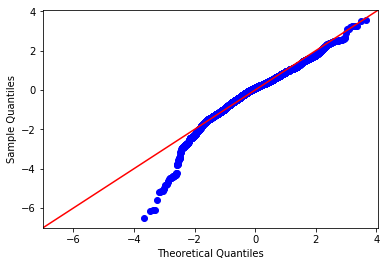

In [41]:
#Your code here - Check normality and homoscedasticity assumptions
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
#Model has improved now that the list price has been log tranformed

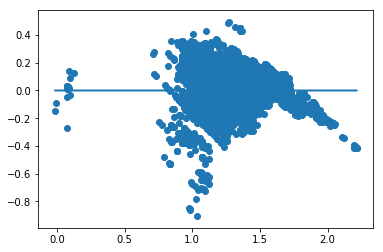

In [42]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 1.49227541173156
0.81 percentile: 1.5069558190910257
0.82 percentile: 1.513483333496972
0.83 percentile: 1.521863282797854
0.84 percentile: 1.5349112664346138
0.85 percentile: 1.5472538252890415
0.86 percentile: 1.551464219787919
0.87 percentile: 1.565989222412791
0.88 percentile: 1.5694324677239833
0.89 percentile: 1.5740858817153383
0.9 percentile: 1.589080154589561
0.91 percentile: 1.6047697820922169
0.92 percentile: 1.6191946258319374
0.93 percentile: 1.6371351481289014
0.94 percentile: 1.6504684261315878
0.95 percentile: 1.6662460521361453
0.96 percentile: 1.6848704067776854
0.97 percentile: 1.7099984275509366
0.98 percentile: 1.7366588791235438
0.99 percentile: 1.7704246874997098


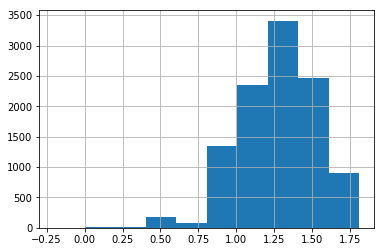

In [43]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

df.list_price.hist()

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 